# LT 3 (Final Version)
v1.01  
*Changes: edited the text in 3a)*

#### Instructor

Joseph Benjamin R. Ilagan  
ITMGT 25 EE

#### Group Members:
    
1) Cai, Eve  

2) Cruz, Gabby

3) Dy, Jazmin

4) Macaranas, Marie

5) Sy, Harold

Please submit through your group's Github Repository on or before **Thursday, 25 July 2019**, at **1:00PM**. 

Submission time be based on the email I will receive indicating that you have already uploaded your work for checking. 

If I don't receive any email from you, I will not check your answers. Any work submitted after **3:00 PM** will not be checked. Also, any work submitted after 1:00PM will have a maximum grade of 180 (out of the 200 total for the whole exam).

This time, I will not consider the timestamps in the repository as basis.

## Exploratory Data Analysis of Spotify track popularity in the Philippines

We will explore Spotify Philippines Top Hits data over the past year.

Spotify has made data available to the public through dedicated websites (for Charts) and through their Developer APIs.

Comma-Separated Value (CSV) files containing weekly Top 200 tracks from the [Spotify Charts](https://spotifycharts.com/regional/ph/weekly/latest) site have been downloaded for you and could be found in the **spotify_data** subdirectory.

### 1) Setup

Let's get a list of these csv files. Run the next two cells below.

In [1]:
import os
import re

In [2]:
file_dir = "./spotify_data"
file_list = os.listdir(file_dir)

#Filter to only .csv files
file_list = [f for f in filter(lambda x: re.search(r"\.csv$", x) , file_list)]

#Add directory prefix
file_list = [file_dir+"/"+f for f in file_list]
file_list

['./spotify_data/regional-ph-weekly-2018-08-03--2018-08-10.csv',
 './spotify_data/regional-ph-weekly-2018-08-17--2018-08-24.csv',
 './spotify_data/regional-ph-weekly-2018-09-21--2018-09-28.csv',
 './spotify_data/regional-ph-weekly-2019-02-01--2019-02-08.csv',
 './spotify_data/regional-ph-weekly-2019-05-24--2019-05-31.csv',
 './spotify_data/regional-ph-weekly-latest.csv',
 './spotify_data/regional-ph-weekly-2018-11-16--2018-11-23.csv',
 './spotify_data/regional-ph-weekly-2018-12-28--2019-01-04.csv',
 './spotify_data/regional-ph-weekly-2018-11-23--2018-11-30.csv',
 './spotify_data/regional-ph-weekly-2019-02-22--2019-03-01.csv',
 './spotify_data/regional-ph-weekly-2019-04-19--2019-04-26.csv',
 './spotify_data/regional-ph-weekly-2019-05-03--2019-05-10.csv',
 './spotify_data/regional-ph-weekly-2019-06-14--2019-06-21.csv',
 './spotify_data/regional-ph-weekly-2018-12-07--2018-12-14.csv',
 './spotify_data/regional-ph-weekly-2019-03-01--2019-03-08.csv',
 './spotify_data/regional-ph-weekly-2019-

We shall now load all csvs as one dataframe. Run the next few cells below.

In [3]:
import pandas as pd

In [4]:
# exclude first row per file
def load_csv(file_name):
    df = pd.read_csv(file_name, skiprows=1)
    df["file_name"] = file_name
    return df
    
df = pd.concat(map(load_csv, file_list))

In [5]:
df.head()

,Position,Track Name,Artist,Streams,URL,file_name
0,1,In My Feelings,Drake,2019924,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,./spotify_data/regional-ph-weekly-2018-08-03--...
1,2,Girls Like You (feat. Cardi B),Maroon 5,1364147,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,./spotify_data/regional-ph-weekly-2018-08-03--...
2,3,Mundo,IV Of Spades,1221053,https://open.spotify.com/track/4u8RkgV6P4TLi89...,./spotify_data/regional-ph-weekly-2018-08-03--...
3,4,Thru These Tears,LANY,1189694,https://open.spotify.com/track/4gB61mP4tNChn4L...,./spotify_data/regional-ph-weekly-2018-08-03--...
4,5,Kathang Isip,Ben&Ben,1165877,https://open.spotify.com/track/3WUEs51GpcvlgU7...,./spotify_data/regional-ph-weekly-2018-08-03--...


In [6]:
df.tail()

,Position,Track Name,Artist,Streams,URL,file_name
195,196,Rumors (with Sofia Carson),R3HAB,143865,https://open.spotify.com/track/4hIhoGN4UTZdNpH...,./spotify_data/regional-ph-weekly-2018-09-14--...
196,197,Never Be the Same,Camila Cabello,143720,https://open.spotify.com/track/4eWQlBRaTjPPUlz...,./spotify_data/regional-ph-weekly-2018-09-14--...
197,198,Meron Nang Iba,Silent Sanctuary,143468,https://open.spotify.com/track/4r7vGTk9HCW7YDo...,./spotify_data/regional-ph-weekly-2018-09-14--...
198,199,Sunday Morning,Maroon 5,143314,https://open.spotify.com/track/5qII2n90lVdPDcg...,./spotify_data/regional-ph-weekly-2018-09-14--...
199,200,What is Love?,TWICE,143116,https://open.spotify.com/track/5Ek40FyMPprcvty...,./spotify_data/regional-ph-weekly-2018-09-14--...


In [7]:
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name'], dtype='object')

Note that the csv files don't have a lot of information in them.

Extract the beginning and ending days (yyyy-mm-dd) of the week as found in the file name.

The file names do have some bits of information we can use later. We can extract beginning and ending days of the week. Let's do that now. Run the cell below.

In [8]:
# Get beginning and ending days (yyyy-mm-dd) of the week as found in the file name
extracted_df = df.loc[:,"file_name"].str.extract(r"([0-9]{4}\-[0-9]{2}\-[0-9]{2})\--([0-9]{4}\-[0-9]{2}\-[0-9]{2})")
extracted_df.columns = ["begin_date","end_date"]
extracted_df.head()


,begin_date,end_date
0,2018-08-03,2018-08-10
1,2018-08-03,2018-08-10
2,2018-08-03,2018-08-10
3,2018-08-03,2018-08-10
4,2018-08-03,2018-08-10


Add this new dataframe to the existing one. Go ahead and run the next cell.

In [9]:
#Add new columns to dataframe
df = pd.concat([df,extracted_df],axis=1)
df.head()

,Position,Track Name,Artist,Streams,URL,file_name,begin_date,end_date
0,1,In My Feelings,Drake,2019924,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10
1,2,Girls Like You (feat. Cardi B),Maroon 5,1364147,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10
2,3,Mundo,IV Of Spades,1221053,https://open.spotify.com/track/4u8RkgV6P4TLi89...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10
3,4,Thru These Tears,LANY,1189694,https://open.spotify.com/track/4gB61mP4tNChn4L...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10
4,5,Kathang Isip,Ben&Ben,1165877,https://open.spotify.com/track/3WUEs51GpcvlgU7...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10


Notice the two new columns `begin_date` and `end_date` to the right of the dataframe.

#### 1a) Extract Track IDs

Spotify tracks are assigned a Track ID, which can be seen embedded in the URL data above. 

The hash-looking characters to the right of "https://open.spotify.com/track/" are the Track IDs. These are what we will extract next.

**Your turn:**

Let's extract that into its own column called **"Track ID"** in the dataframe.

**(10 points)**

In [10]:
## write your code below.
## remnants of tests from the previous run are shown on the output area for your reference.

track_id_df = df.loc[:,"URL"].str.extract(r"(\w{22}$)")
track_id_df.columns = ['Track ID']

df = pd.concat([df,track_id_df],axis=1)


In [11]:
## check your work here
## remnants of the output from a previous run are shown below for reference

df.head()


,Position,Track Name,Artist,Streams,URL,file_name,begin_date,end_date,Track ID
0,1,In My Feelings,Drake,2019924,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2G7V7zsVDxg1yRsu7Ew9RJ
1,2,Girls Like You (feat. Cardi B),Maroon 5,1364147,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,7fa9MBXhVfQ8P8Df9OEbD8
2,3,Mundo,IV Of Spades,1221053,https://open.spotify.com/track/4u8RkgV6P4TLi89...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4u8RkgV6P4TLi89SmlUtv8
3,4,Thru These Tears,LANY,1189694,https://open.spotify.com/track/4gB61mP4tNChn4L...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4gB61mP4tNChn4LgfquMhi
4,5,Kathang Isip,Ben&Ben,1165877,https://open.spotify.com/track/3WUEs51GpcvlgU7...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,3WUEs51GpcvlgU7lehLgLh


### 2) Working with Master Data

We need more detailed information about the things of significance we are analyzing. In particular, we need to know more about the individual tracks (including audio features such as energy, danceability, or speechiness) and artists (including name and genres). 

Spotify provides an Application Programming Interface (API) to allow software developers to access these pieces of information through web services. 

We've previously used these APIs to extract master data based on the specific tracks found in the PH Top 200 weekly data loaded in the dataframe above. 

We shall now load tracks from JSON file **tracks.json**. The data was previously extracted via the Spotify Web API.

The keys and values are taken from the [Spotify Web API Documentation Page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/).

<table>
  <thead>
    <tr>
      <th>Key</th>
      <th>Value Type</th>
      <th>Value Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>album</td>
      <td>a simplified <a href="/documentation/web-api/reference/object-model/#album-object-simplified">album object</a></td>
      <td>The album on which the track appears. The album object includes a link in <code class="highlighter-rouge">href</code> to full information about the album.</td>
    </tr>
    <tr>
      <td>artists</td>
      <td>an array of simplified <a href="/documentation/web-api/reference/object-model/#artist-object-simplified">artist objects</a></td>
      <td>The artists who performed the track. Each artist object includes a link in <code class="highlighter-rouge">href</code> to more detailed information about the artist.</td>
    </tr>
    <tr>
      <td>available_markets</td>
      <td>array of strings</td>
      <td>A list of the countries in which the track can be played, identified by their <a href="http://en.wikipedia.org/wiki/ISO_3166-1_alpha-2">ISO 3166-1 alpha-2</a> code.</td>
    </tr>
    <tr>
      <td>disc_number</td>
      <td>integer</td>
      <td>The disc number (usually <code class="highlighter-rouge">1</code> unless the album consists of more than one disc).</td>
    </tr>
    <tr>
      <td>duration_ms</td>
      <td>integer</td>
      <td>The track length in milliseconds.</td>
    </tr>
    <tr>
      <td>explicit</td>
      <td>Boolean</td>
      <td>Whether or not the track has explicit lyrics ( <code class="highlighter-rouge">true</code> = yes it does; <code class="highlighter-rouge">false</code> = no it does not OR unknown).</td>
    </tr>
    <tr>
      <td>external_ids</td>
      <td>an <a href="/documentation/web-api/reference/object-model/#external-id-object">external ID object</a></td>
      <td>Known external IDs for the track.</td>
    </tr>
    <tr>
      <td>external_urls</td>
      <td>an <a href="/documentation/web-api/reference/object-model/#external-url-object">external URL object</a></td>
      <td>Known external URLs for this track.</td>
    </tr>
    <tr>
      <td>href</td>
      <td>string</td>
      <td>A link to the Web API endpoint providing full details of the track.</td>
    </tr>
    <tr>
      <td>id</td>
      <td>string</td>
      <td>The <a href="/documentation/web-api/#spotify-uris-and-ids">Spotify ID</a> for the track.</td>
    </tr>
    <tr>
      <td>is_playable</td>
      <td>boolean</td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied. If <code class="highlighter-rouge">true</code> , the track is playable in the given market. Otherwise <code class="highlighter-rouge">false</code>.</td>
    </tr>
    <tr>
      <td>linked_from</td>
      <td>a <a href="/documentation/web-api/reference/object-model/#track-link">linked track object</a></td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied, and the requested track has been replaced with different track. The track in the <code class="highlighter-rouge">linked_from</code> object contains information about the originally requested track.</td>
    </tr>
    <tr>
      <td>restrictions</td>
      <td>a restrictions object</td>
      <td>Part of the response when <a href="/documentation/general/guides/track-relinking-guide/">Track Relinking</a> is applied, the original track is not available in the given market, and Spotify did not have any tracks to relink it with. The track response will still contain metadata for the original track, and a restrictions object containing the reason why the track is not available: <code class="highlighter-rouge">"restrictions" : {"reason" : "market"}</code></td>
    </tr>
    <tr>
      <td>name</td>
      <td>string</td>
      <td>The name of the track.</td>
    </tr>
    <tr>
      <td>popularity</td>
      <td>integer</td>
      <td>The popularity of the track. The value will be between 0 and 100, with 100 being the most popular.<br />The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.<br />Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.</td>
    </tr>
    <tr>
      <td>preview_url</td>
      <td>string</td>
      <td>A link to a 30 second preview (MP3 format) of the track. Can be <code class="highlighter-rouge">null</code></td>
    </tr>
    <tr>
      <td>track_number</td>
      <td>integer</td>
      <td>The number of the track. If an album has several discs, the track number is the number on the specified disc.</td>
    </tr>
    <tr>
      <td>type</td>
      <td>string</td>
      <td>The object type: “track”.</td>
    </tr>
    <tr>
      <td>uri</td>
      <td>string</td>
      <td>The <a href="/documentation/web-api/#spotify-uris-and-ids">Spotify URI</a> for the track.</td>
    </tr>
  </tbody>
</table>

Let's go ahead and load these files.

In [12]:
import json

with open(file_dir+"/tracks.json","r") as tracks_file:
    tracks = json.load(tracks_file)

In [13]:
# display first 20 tracks only
tracks[:20]

[{'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
     'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
     'id': '3TVXtAsR1Inumwj472S9r4',
     'name': 'Drake',
     'type': 'artist',
     'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
   'external_urls': {'spotify': 'https://open.spotify.com/album/1ATL5GLyefJaxhQzSPVrLX'},
   'href': 'https://api.spotify.com/v1/albums/1ATL5GLyefJaxhQzSPVrLX',
   'id': '1ATL5GLyefJaxhQzSPVrLX',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/542d705154be4049fc927050d006987e63739bbd',
     'width': 640},
    {'height': 300,
     'url': 'https://i.scdn.co/image/239ec906572231368d8ebd72614094bd3bd10b33',
     'width': 300},
    {'height': 64,
     'url': 'https://i.scdn.co/image/f12257240bbec6ddfa780253ac939e646eba2a36',
     'width': 64}],
   'name': 'Scorpion',
   'release_date': '2018-06-29',
   'release_date_precision': 

Let's compare the **original_id** and the **id** of the track master data. You'll note that some entries don't match, and this may cause problems when you try cross-referencing what is included in Spotify Charts data and what's actually included in the API data. Go on, run the next cell.

In [14]:
[(t["original_id"],t["id"]) for t in tracks]

[('2G7V7zsVDxg1yRsu7Ew9RJ', '2G7V7zsVDxg1yRsu7Ew9RJ'),
 ('7fa9MBXhVfQ8P8Df9OEbD8', '7fa9MBXhVfQ8P8Df9OEbD8'),
 ('4u8RkgV6P4TLi89SmlUtv8', '4u8RkgV6P4TLi89SmlUtv8'),
 ('4gB61mP4tNChn4LgfquMhi', '7GbAp0HKPQW7WnFJAzMoRk'),
 ('3WUEs51GpcvlgU7lehLgLh', '3WUEs51GpcvlgU7lehLgLh'),
 ('2BgD4nRyx9EZ5o8YEnjRSV', '2BgD4nRyx9EZ5o8YEnjRSV'),
 ('3VQb0rq27GPX92X53Ni1Lc', '6p6DiqAPwMX7vdrSo30wgo'),
 ('6SFStUDQZNaGPKWOx9ZiJB', '2BgEsaKNfHUdlh97KmvFyo'),
 ('5WvAo7DNuPRmk4APhdPzi8', '5WvAo7DNuPRmk4APhdPzi8'),
 ('2CWnuF7ht55Ajyeg4WPvWu', '7b8YOVV5quZcSKEijDgyWB'),
 ('0ztDBQdQmdVZvorSmIjMih', '0ztDBQdQmdVZvorSmIjMih'),
 ('3u1S1OmAUhx5DRlLrXqyp3', '3u1S1OmAUhx5DRlLrXqyp3'),
 ('0d2iYfpKoM0QCKvcLCkBao', '0d2iYfpKoM0QCKvcLCkBao'),
 ('00mBzIWv5gHOYxwuEJXjOG', '00mBzIWv5gHOYxwuEJXjOG'),
 ('7gkWXbAxIYuvtOpcN3p9GJ', '5OCJzvD7sykQEKHH7qAC3C'),
 ('4Is1b37KJY9XVCgzp81FBW', '4Is1b37KJY9XVCgzp81FBW'),
 ('3BPoSr2pO34Aan6alFfVto', '3BPoSr2pO34Aan6alFfVto'),
 ('4keoy2fqgwGnbWlm3ZVZFa', '4keoy2fqgwGnbWlm3ZVZFa'),
 ('3nc420P

#### 2a) Create a dictionary `tracks_dict` whose keys are the track ids (with attribute "id") and the values are dictionaries with the following attributes and values:

We need a fast, in-memory placeholder of tracks data where we could simply reference additional track attributes via some key (in our specific case, the Track ID, or rather, the Original ID). In Python, this can be achieved through a **dictionary**.

Recall that dictionaries can have subdictionaries in them. Create a dictionary whose keys are the original ids and the values are dictionaries containing the following attributes:

- "name" (Track Name)
- "duration_ms" (Duration in Milliseconds)
- "artist_id" (ID of the first artist in a list of artists)
- "artist_name" (Name of the first artist in a list of artists)

**(20 points)**


In [15]:
tracks_dict = {}

for i in range(len(tracks)):
    name = tracks[i]["name"]
    duration_ms = tracks[i]["duration_ms"]
    artist_id = tracks[i]["artists"][0]["id"]
    artist_name = tracks[i]["artists"][0]["name"]
    id = tracks[i]["original_id"]
    tracks_dict.update({id:{"name":name,"id":id, "duration_ms":duration_ms, 
                            "artist_id":artist_id, "artist_name":artist_name}})


In [16]:
# display tracks_dict to verify changes
## remnants from previous run shown below for your reference

## write code below
## ----------------
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5'},
 '4u8RkgV6P4TLi89SmlUtv8': {'name': 'Mundo',
  'id': '4u8RkgV6P4TLi89SmlUtv8',
  'duration_ms': 349713,
  'artist_id': '4k9wp4ipHdA1bu1T4x1ZTG',
  'artist_name': 'IV Of Spades'},
 '4gB61mP4tNChn4LgfquMhi': {'name': 'Thru These Tears',
  'id': '4gB61mP4tNChn4LgfquMhi',
  'duration_ms': 204515,
  'artist_id': '49tQo2QULno7gxHutgccqF',
  'artist_name': 'LANY'},
 '3WUEs51GpcvlgU7lehLgLh': {'name': 'Kathang Isip',
  'id': '3WUEs51GpcvlgU7lehLgLh',
  'duration_ms': 318814,
  'artist_id': '4DAcJXcjX0zlQAZAPAx4Zb',
  'artist_name': 'Ben&Ben'},
 '2BgD4nRyx9EZ5o8YEnjRSV': {'name': "Kung 'Di Rin Lang Ikaw",
  'id': '2BgD4n

---  


We will now load tracks from JSON file **audio_features.json**. The data was previously extracted via the Spotify Web API. The keys and values are taken from the description in the [Spotify Web API documentation page](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/). 

<table>
  <thead>
    <tr>
      <th>Key</th>
      <th>Value Type</th>
      <th>Value Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>acousticness</td>
      <td>float</td>
      <td>A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.</td>
    </tr>
    <tr>
      <td>analysis_url</td>
      <td>string</td>
      <td>An HTTP URL to access the full audio analysis of this track. An access token is required to access this data.</td>
    </tr>
    <tr>
      <td>danceability</td>
      <td>float</td>
      <td>Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.</td>
    </tr>
    <tr>
      <td>duration_ms</td>
      <td>int</td>
      <td>The duration of the track in milliseconds.</td>
    </tr>
    <tr>
      <td>energy</td>
      <td>float</td>
      <td>Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.</td>
    </tr>
    <tr>
      <td>id</td>
      <td>string</td>
      <td>The Spotify ID for the track.</td>
    </tr>
    <tr>
      <td>instrumentalness</td>
      <td>float</td>
      <td>Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.</td>
    </tr>
    <tr>
      <td>key</td>
      <td>int</td>
      <td>The key the track is in. Integers map to pitches using standard <a href="https://en.wikipedia.org/wiki/Pitch_class">Pitch Class notation</a> . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.</td>
    </tr>
    <tr>
      <td>liveness</td>
      <td>float</td>
      <td>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.</td>
    </tr>
    <tr>
      <td>loudness</td>
      <td>float</td>
      <td>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.</td>
    </tr>
    <tr>
      <td>mode</td>
      <td>int</td>
      <td>Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
    </tr>
    <tr>
      <td>speechiness</td>
      <td>float</td>
      <td>Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.</td>
    </tr>
    <tr>
      <td>tempo</td>
      <td>float</td>
      <td>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.</td>
    </tr>
    <tr>
      <td>time_signature</td>
      <td>int</td>
      <td>An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).</td>
    </tr>
    <tr>
      <td>track_href</td>
      <td>string</td>
      <td>A link to the Web API endpoint providing full details of the track.</td>
    </tr>
    <tr>
      <td>type</td>
      <td>string</td>
      <td>The object type: “audio_features”</td>
    </tr>
    <tr>
      <td>uri</td>
      <td>string</td>
      <td>The Spotify URI for the track.</td>
    </tr>
    <tr>
      <td>valence</td>
      <td>float</td>
      <td>A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
    </tr>
  </tbody>
</table>

Let's proceed with running the next few cells.

In [17]:
import json

with open(file_dir+"/audio_features.json","r") as audio_features_file:
    audio_features = json.load(audio_features_file)

In [18]:
audio_features[:20]

[{'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 {'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode': 1,
  'speechiness': 0.0505,
  'acousticness': 0.568,
  'instrumentalness': 0,
  'liveness': 0.13,
  'valence': 0.448,
  'tempo': 124.959,
  'type': 'audio_features',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'uri': 'spotify:track:7fa9MBXhVfQ8P8Df9OEbD8',
  'track_href': 'https://api.spotify.com/v1/tracks/7fa9MBXhVfQ8P8Df9OE

#### 2b) Add audio features attributes to `tracks_dict`

For convenience, we shall update the `tracks_dict` dictionary with more attributes from the audio_features data we just uploaded.

Use the key 'original_id' as basis to update tracks_dict. Note that the `audio_features` dictionary entries also have the 'original_id' key so use that.

**Hint:** one way to do this is through the use of the `dict.update()` method. If we were not able to cover this in class, now is the time to do research.

**(10 points)**

In [19]:
current = 0

for j in tracks_dict:
    tracks_dict[j].update({"danceability":audio_features[current]["danceability"]})
    tracks_dict[j].update({"energy":audio_features[current]["energy"]})
    tracks_dict[j].update({"key":audio_features[current]["key"]})
    tracks_dict[j].update({"loudness":audio_features[current]["loudness"]})
    tracks_dict[j].update({"mode":audio_features[current]["mode"]})
    tracks_dict[j].update({"speechiness":audio_features[current]["speechiness"]})
    tracks_dict[j].update({"acousticness":audio_features[current]["acousticness"]})
    tracks_dict[j].update({"instrumentalness":audio_features[current]["instrumentalness"]})
    tracks_dict[j].update({"liveness":audio_features[current]["liveness"]})
    tracks_dict[j].update({"valence":audio_features[current]["valence"]})
    tracks_dict[j].update({"tempo":audio_features[current]["tempo"]})
    tracks_dict[j].update({"type":audio_features[current]["type"]})
    tracks_dict[j].update({"id":audio_features[current]["id"]})
    tracks_dict[j].update({"uri":audio_features[current]["uri"]})
    tracks_dict[j].update({"track_href":audio_features[current]["track_href"]})
    tracks_dict[j].update({"analysis_url":audio_features[current]["analysis_url"]})
    tracks_dict[j].update({"duration_ms":audio_features[current]["duration_ms"]})
    tracks_dict[j].update({"time_signature":audio_features[current]["time_signature"]})
    tracks_dict[j].update({"original_id":audio_features[current]["original_id"]})
    current += 1

In [20]:
# inspect tracks_dict to determine if the audio_features attributes have been carried over
tracks_dict

{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ'},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',
  'artist_name': 'Maroon 5',
  'danceability': 0.851,
  'energy': 0.541,
  'key': 0,
  'loudness': -6.825,
  'mode':

After running the previous cell, you should notice the new subdictionary attributes included.

In [21]:
len(tracks_dict)

794

The number of tracks is visibly lower than the number of records we uploaded from the Charts data. This is understandable as we are now working with unique (original) Track IDs.

Finally, we will now load tracks from JSON file **artists.json**. The data was previously extracted via the Spotify Web API. Go ahead and run the next few cells.

In [22]:
import json

with open(file_dir+"/artists.json","r") as artists_file:
    artists = json.load(artists_file)

Let's take a look at the first 5 entries:

In [23]:
artists[:5]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6ydoSd3N2mwgwBHtF6K7eX'},
  'followers': {'href': None, 'total': 1349550},
  'genres': ['australian pop', 'pop'],
  'href': 'https://api.spotify.com/v1/artists/6ydoSd3N2mwgwBHtF6K7eX',
  'id': '6ydoSd3N2mwgwBHtF6K7eX',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/1134c6cc39953feb998c83d5a7356ce6d1548a5c',
    'width': 640},
   {'height': 320,
    'url': 'https://i.scdn.co/image/87e98ba41d0405dd4a0a5aeca6f5f1ffea5a29bf',
    'width': 320},
   {'height': 160,
    'url': 'https://i.scdn.co/image/c016cd05bbb2e12a1e5d6d40e6e38f27363eb038',
    'width': 160}],
  'name': 'Calum Scott',
  'popularity': 78,
  'type': 'artist',
  'uri': 'spotify:artist:6ydoSd3N2mwgwBHtF6K7eX'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/5qRSs6mvI17zrkJpOHkCoM'},
  'followers': {'href': None, 'total': 1907419},
  'genres': ['k-pop', 'k-pop boy group'],
  'href': 'https://api.spotify.com/v1/artists/5qRSs6mvI17z

#### 2c) Create a dictionary `artists_dict` whose keys are the artist ids (with attribute "id") and the values are dictionaries with the following attributes and values:

Similar to tracks, we need an easy mechanism to look up Artist master data simply by using the artist id as key.

Let's prepare a new dictionary `artists_dict` with the following attributes:

- "name" (Track Name)
- "genres" (Genres of the Artist)

Be careful to note that the value of `genres` is actually a list. This is perfectly fine in a dictionary setup, but be aware that there could be one or more genres attributed to each Artist.

**(10 points)**

In [24]:
## write code below
## ------------------------


artists_dict = {}

for i in range(len(artists)):
    artists_dict.update({artists[i]["id"]:{"name":artists[i]["name"],"genres":artists[i]["genres"]}})






Let's inspect the new dictionary:

In [25]:
## remnants from previous run shown below for your reference
artists_dict

{'6ydoSd3N2mwgwBHtF6K7eX': {'name': 'Calum Scott',
  'genres': ['australian pop', 'pop']},
 '5qRSs6mvI17zrkJpOHkCoM': {'name': 'iKON',
  'genres': ['k-pop', 'k-pop boy group']},
 '09Xydf4dlkr29dH99DmsvQ': {'name': 'Janine Teñoso', 'genres': ['opm']},
 '74KM79TiuVKeVCqs8QtB0B': {'name': 'Sabrina Carpenter',
  'genres': ['dance pop', 'pop', 'post-teen pop', 'viral pop']},
 '0DnjaQqb436AH1idffI6CQ': {'name': 'Yeng Constantino',
  'genres': ['classic opm', 'opm']},
 '6aiCKnIN68hohzU3ZzNq48': {'name': 'Sarah Geronimo',
  'genres': ['classic opm', 'opm']},
 '6k0IBR0lU42s2GYpNX7kA9': {'name': 'Brian McKnight',
  'genres': ['dance pop',
   'neo soul',
   'new jack swing',
   'quiet storm',
   'r&b',
   'urban contemporary']},
 '6USv9qhCn6zfxlBQIYJ9qs': {'name': 'Dominic Fike',
  'genres': ['alternative pop rock']},
 '4BNWanhw4AjSXjBm9L1Jzy': {'name': 'Juris', 'genres': ['classic opm', 'opm']},
 '5qa31A9HySw3T7MKWI9bGg': {'name': 'FLETCHER',
  'genres': ['dance pop',
   'electropop',
   'indie 

In [26]:
len(artists_dict)

304

#### 2d) Add **artist_genre** attribute per track in the tracks_dict dictionary. 

We are assuming for now that tracks inherit directly the genre from the artist and that no tracks deviate from the artist's general genre.

Again, for convenience, let's beef up tracks_dict with more attributes, this time from the artist data we just prepared. Assign a new attribute "artist_genre" in `tracks_dict`.

**Hint:** Note that `tracks_dict` has an "artist_id" attribute; use this to look up the attributes from `artists_dict`.


**(15 points)**

In [27]:
## Write code below
## ----------------

original_id_list = list()

for i in range(len(tracks)):
    original_id = tracks[i]["original_id"]
    original_id_list.append(original_id)

artist_id_list = list()


for og_id in original_id_list:
    artist_id = tracks_dict[og_id]["artist_id"]
    artist_id_list.append(artist_id)


In [28]:
for og_id in original_id_list:
    for a_id in artist_id_list:
        if ((tracks_dict[og_id]["artist_id"]) == a_id):
            tracks_dict[og_id].update({"artist_genres":artists_dict[a_id]['genres']})

#### 2e) Inspect **tracks_dict** and verify that the entries now have the 'artist_genres' property.

**(3 points)**

In [29]:
## remnants from previous run shown below for your reference

tracks_dict


{'2G7V7zsVDxg1yRsu7Ew9RJ': {'name': 'In My Feelings',
  'id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'duration_ms': 217925,
  'artist_id': '3TVXtAsR1Inumwj472S9r4',
  'artist_name': 'Drake',
  'danceability': 0.835,
  'energy': 0.626,
  'key': 1,
  'loudness': -5.833,
  'mode': 1,
  'speechiness': 0.125,
  'acousticness': 0.0589,
  'instrumentalness': 6e-05,
  'liveness': 0.396,
  'valence': 0.35,
  'tempo': 91.03,
  'type': 'audio_features',
  'uri': 'spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ',
  'track_href': 'https://api.spotify.com/v1/tracks/2G7V7zsVDxg1yRsu7Ew9RJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2G7V7zsVDxg1yRsu7Ew9RJ',
  'time_signature': 4,
  'original_id': '2G7V7zsVDxg1yRsu7Ew9RJ',
  'artist_genres': ['canadian hip hop',
   'canadian pop',
   'hip hop',
   'pop rap',
   'rap',
   'toronto rap']},
 '7fa9MBXhVfQ8P8Df9OEbD8': {'name': 'Girls Like You (feat. Cardi B)',
  'id': '7fa9MBXhVfQ8P8Df9OEbD8',
  'duration_ms': 235545,
  'artist_id': '04gDigrS5kc9YWfZHwBETP',


In [30]:
# verify that the length of tracks_dict is still the same
len(tracks_dict)

794

### 3) More Data Transformation: Feature Extractions and Aggregations

We shall revisit our original dataframe and introduce additional columns to make our analysis and insights easier in the succeeding numbers.

Let's display the head of the dataframe `df` here again. Go ahead and run the next cell.

In [31]:
df.head()

,Position,Track Name,Artist,Streams,URL,file_name,begin_date,end_date,Track ID
0,1,In My Feelings,Drake,2019924,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2G7V7zsVDxg1yRsu7Ew9RJ
1,2,Girls Like You (feat. Cardi B),Maroon 5,1364147,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,7fa9MBXhVfQ8P8Df9OEbD8
2,3,Mundo,IV Of Spades,1221053,https://open.spotify.com/track/4u8RkgV6P4TLi89...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4u8RkgV6P4TLi89SmlUtv8
3,4,Thru These Tears,LANY,1189694,https://open.spotify.com/track/4gB61mP4tNChn4L...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4gB61mP4tNChn4LgfquMhi
4,5,Kathang Isip,Ben&Ben,1165877,https://open.spotify.com/track/3WUEs51GpcvlgU7...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,3WUEs51GpcvlgU7lehLgLh


#### 3a) Add audio feature columns to the dataframe  

Let's add the following:
* Genres ("artist_genres" key will be mapped to "genres")
* Danceability ("danceability")
* Energy ("energy")
* Loudness ("loudness")
* Mode ("mode")
* Speechiness ("speechiness")
* Acousticness ("acousticness")
* Instrumentalness ("instrumentalness")
* Liveness ("liveness")
* Valence ("valence")
* Tempo ("tempo")

  
We will use the Pandas `df.apply(...)` with a lambda function method to perform this task. 

We will create a new dataframe from the original one and then assign to new columns in the original dataframe.

**(15 points)**

In [32]:
df

,Position,Track Name,Artist,Streams,URL,file_name,begin_date,end_date,Track ID
0,1,In My Feelings,Drake,2019924,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2G7V7zsVDxg1yRsu7Ew9RJ
1,2,Girls Like You (feat. Cardi B),Maroon 5,1364147,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,7fa9MBXhVfQ8P8Df9OEbD8
2,3,Mundo,IV Of Spades,1221053,https://open.spotify.com/track/4u8RkgV6P4TLi89...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4u8RkgV6P4TLi89SmlUtv8
3,4,Thru These Tears,LANY,1189694,https://open.spotify.com/track/4gB61mP4tNChn4L...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4gB61mP4tNChn4LgfquMhi
4,5,Kathang Isip,Ben&Ben,1165877,https://open.spotify.com/track/3WUEs51GpcvlgU7...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,3WUEs51GpcvlgU7lehLgLh
5,6,Kung 'Di Rin Lang Ikaw,December Avenue,1089312,https://open.spotify.com/track/2BgD4nRyx9EZ5o8...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2BgD4nRyx9EZ5o8YEnjRSV
6,7,'Di Na Muli,Janine Teñoso,1043496,https://open.spotify.com/track/3VQb0rq27GPX92X...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,3VQb0rq27GPX92X53Ni1Lc
7,8,2002,Anne-Marie,1042855,https://open.spotify.com/track/6SFStUDQZNaGPKW...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,6SFStUDQZNaGPKWOx9ZiJB
8,9,No Brainer,DJ Khaled,969262,https://open.spotify.com/track/5WvAo7DNuPRmk4A...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,5WvAo7DNuPRmk4APhdPzi8
9,10,DDU-DU DDU-DU - KR Ver.,BLACKPINK,903723,https://open.spotify.com/track/2CWnuF7ht55Ajye...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2CWnuF7ht55Ajyeg4WPvWu


In [33]:
## write code below
## -------------------

df["genres"] = df.apply(lambda x: tracks_dict[x["Track ID"]]["artist_genres"], axis=1).copy()
df["danceability"] = df.apply(lambda x: tracks_dict[x["Track ID"]]["danceability"], axis=1).copy()
df["energy"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["energy"]), axis=1).copy()
df["loudness"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["loudness"]), axis=1).copy()
df["mode"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["mode"]), axis=1).copy()
df["speechiness"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["speechiness"]), axis=1).copy()
df["acousticness"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["acousticness"]), axis=1).copy()
df["instrumentalness"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["instrumentalness"]), axis=1).copy()
df["liveness"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["liveness"]), axis=1).copy()
df["valence"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["valence"]), axis=1).copy()
df["tempo"] = df.apply(lambda x: str(tracks_dict[x["Track ID"]]["tempo"]), axis=1).copy()

## -------------------
## remnants from previous run shown below for your reference
df

,Position,Track Name,Artist,Streams,URL,file_name,begin_date,end_date,Track ID,genres,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1,In My Feelings,Drake,2019924,https://open.spotify.com/track/2G7V7zsVDxg1yRs...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2G7V7zsVDxg1yRsu7Ew9RJ,"[canadian hip hop, canadian pop, hip hop, pop ...",0.835,0.626,-5.833,1,0.125,0.0589,6e-05,0.396,0.35,91.03
1,2,Girls Like You (feat. Cardi B),Maroon 5,1364147,https://open.spotify.com/track/7fa9MBXhVfQ8P8D...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,7fa9MBXhVfQ8P8Df9OEbD8,[pop],0.851,0.541,-6.825,1,0.0505,0.568,0,0.13,0.448,124.959
2,3,Mundo,IV Of Spades,1221053,https://open.spotify.com/track/4u8RkgV6P4TLi89...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4u8RkgV6P4TLi89SmlUtv8,"[opm, pinoy indie, pinoy rock, pinoy trap]",0.705,0.401,-8.9,1,0.0376,0.176,8.66e-06,0.0735,0.481,140.031
3,4,Thru These Tears,LANY,1189694,https://open.spotify.com/track/4gB61mP4tNChn4L...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,4gB61mP4tNChn4LgfquMhi,"[la pop, pop]",0.711,0.517,-7.695,1,0.0391,0.154,0,0.149,0.294,119.945
4,5,Kathang Isip,Ben&Ben,1165877,https://open.spotify.com/track/3WUEs51GpcvlgU7...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,3WUEs51GpcvlgU7lehLgLh,"[opm, pinoy indie, pinoy rock]",0.491,0.314,-8.58,1,0.0301,0.776,4.76e-06,0.152,0.295,126.921
5,6,Kung 'Di Rin Lang Ikaw,December Avenue,1089312,https://open.spotify.com/track/2BgD4nRyx9EZ5o8...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2BgD4nRyx9EZ5o8YEnjRSV,"[opm, pinoy indie, pinoy pop punk]",0.502,0.482,-4.736,1,0.0288,0.161,0,0.187,0.132,133.894
6,7,'Di Na Muli,Janine Teñoso,1043496,https://open.spotify.com/track/3VQb0rq27GPX92X...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,3VQb0rq27GPX92X53Ni1Lc,[opm],0.413,0.561,-3.092,1,0.0517,0.192,0,0.0914,0.352,88.69
7,8,2002,Anne-Marie,1042855,https://open.spotify.com/track/6SFStUDQZNaGPKW...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,6SFStUDQZNaGPKWOx9ZiJB,"[dance pop, pop, post-teen pop, tropical house...",0.697,0.683,-2.881,0,0.117,0.0372,0,0.137,0.603,96.133
8,9,No Brainer,DJ Khaled,969262,https://open.spotify.com/track/5WvAo7DNuPRmk4A...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,5WvAo7DNuPRmk4APhdPzi8,"[hip hop, miami hip hop, pop, pop rap, rap, so...",0.552,0.76,-4.706,1,0.342,0.0733,0,0.0865,0.639,135.702
9,10,DDU-DU DDU-DU - KR Ver.,BLACKPINK,903723,https://open.spotify.com/track/2CWnuF7ht55Ajye...,./spotify_data/regional-ph-weekly-2018-08-03--...,2018-08-03,2018-08-10,2CWnuF7ht55Ajyeg4WPvWu,"[j-pop girl group, k-pop, k-pop girl group]",0.665,0.86,-3.921,0,0.0761,0.0322,0,0.281,0.372,139.973


In [34]:
len(df)

10600

#### 3b) Extract genres
  
Prepare a tally board named `genre_tally_dict` that counts the number of streams of a particular genre across all tracks in the dataframe. Note that the **"genres"** column contains lists, so you may have to go through the elements of each list.

Make a copy of the dataframe.
  
**Be careful:** we are counting streams, not simple occurrences. We are accumulating stream counts, so you might get confused with a previous test or exercise involving word counts.

**(15 points)**

In [35]:
## write code below
## -------------------------

streamslist = [(i) for i in df.loc[:,"Streams"]]
genrelist1 = [(i) for i in df.loc[:,"genres"]]

print(streamslist[:5])
print(genrelist1[:5])


[2019924, 1364147, 1221053, 1189694, 1165877]
[['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap', 'toronto rap'], ['pop'], ['opm', 'pinoy indie', 'pinoy rock', 'pinoy trap'], ['la pop', 'pop'], ['opm', 'pinoy indie', 'pinoy rock']]


In [36]:
finalgenretally1 = []
finalgenretally2 = []

for i in range(len(streamslist)):
    for j in range(len(genrelist1[i])):
        finalgenretally1.append(streamslist[i])
        finalgenretally2.append(genrelist1[i][j])
        
print(finalgenretally1[:5])
print(finalgenretally2[:5])
    

[2019924, 2019924, 2019924, 2019924, 2019924]
['canadian hip hop', 'canadian pop', 'hip hop', 'pop rap', 'rap']


In [37]:
genreset = set(finalgenretally2)
len(genreset)

187

In [38]:
genre_tally_dict = {}


for k in genreset:
    genre_tally_dict[k] = 0
    
now = 0
for k in finalgenretally2:
    genre_tally_dict[k] += int(finalgenretally1[now])
    now += 1


We shall now prepare a new dataframe `genre_df` from `genre_tally_dict`. The code to do this has already been provided for you below, so go ahead and run the cell.

In [39]:
# you need to have successfully created genre_tally_dict for this to work
# remnants from previous run shown below for your reference
genre_df = pd.DataFrame([(k,v) for k,v in genre_tally_dict.items()],columns=["genre","count"]).copy()
genre_df.head()

,genre,count
0,trance,2465022
1,pinoy trap,97028274
2,house,18823612
3,quiet storm,1351311
4,brostep,53698327


#### 3c) Sort genre dataframe by count in descending order

Make sure that changes to the sorting order are made in-place and that you reset the index.

**(2 points)**

In [40]:
## write code below
## -----------------


genre_df.sort_values(by=["count"], ascending=False)




,genre,count
44,pop,1868747108
38,opm,1503883683
92,pinoy indie,1035355791
84,dance pop,975557841
133,post-teen pop,889830566
63,pinoy rock,689103823
50,tropical house,304517084
141,classic opm,295228389
160,edm,254261140
184,pinoy pop punk,239302951


#### 3d) Extract month and year

Let's go back to our first dataframe `df`. We will need to do aggregation based on charting month (which is a combination of the year and month).

Add a column `chart_month` which contains the value yyyy-mm from the **"end_date"** column.

**(10 Points)**

In [41]:
## write code below
## -------------------

df["chart_month"] = [str(i) for i in df.loc[:,"end_date"]]
df["chart_month"] = [str(i[:7]) for i in df.loc[:,"chart_month"]] 




## -------------------
## remnants from previous test shown below for your reference
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'genres', 'danceability',
       'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'chart_month'],
      dtype='object')

#### 3e) Create a new dataframe containing an aggregate of Total Streams from Artists by chart month

Prepare a new dataframe `artist_streams_df`.

Sort by Streams in descending order (ascending=False).

Be sure to make a copy of the dataframe from group by/aggregation operations against `df`. Also drop any resulting 'index' column introduced.

**(10 points)**

In [42]:
## write code below
## ----------------

artist_streams_df = df.groupby(["Artist","chart_month"], as_index=False).sum()
artist_streams_df = artist_streams_df.drop(columns=["danceability","Position"])


## remnants from previous run shown below for your reference
## ------------------
artist_streams_df.sort_values(by="Streams",ascending=False).head()

,Artist,chart_month,Streams
992,LANY,2018-10,32356946
993,LANY,2018-11,31811242
463,December Avenue,2019-03,29451112
462,December Avenue,2019-02,25046510
459,December Avenue,2018-11,22366637


#### 3f) Mean Audio Features per Artist

Prepare a new dataframe `mean_audio_features_df` that has the following columns:

- Artists
- danceability
- liveness
- instrumentalness
- loudness
- speechiness
- valence
- mode,

where the features are the average or mean values per Artist. **Sort** this new dataframe **by danceability** in descending order (i.e. `ascending=False`).

**(15 points)**

In [43]:
# revisit df columns
# remnants from previous run shown below for your reference
df.columns

Index(['Position', 'Track Name', 'Artist', 'Streams', 'URL', 'file_name',
       'begin_date', 'end_date', 'Track ID', 'genres', 'danceability',
       'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'chart_month'],
      dtype='object')

In [44]:
df.loc[:,"energy":"tempo"]=df.loc[:,"energy":"tempo"].apply(pd.to_numeric)

In [45]:
## write code below
## -----------------------

mean_audio_features_df = df.groupby(["Artist"], as_index=False)['danceability','energy', 'loudness', 'mode', 'speechiness',
                                                                'acousticness','instrumentalness', 'liveness', 'valence', 'tempo'].mean()
mean_audio_features_df = mean_audio_features_df.sort_values(by=["danceability"],ascending=False)
## -----------------------
## remnants from previous run shown below for your reference
mean_audio_features_df.head(10)

,Artist,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
168,Lavaado,0.939000,0.463000,-9.152000,0.000000,0.421000,0.072300,0.000000,0.082600,0.642000,137.051000
4,6ix9ine,0.903250,0.463000,-8.506750,0.750000,0.327075,0.068875,0.000000,0.188000,0.452750,129.990250
148,Kanye West,0.901000,0.522000,-8.304000,1.000000,0.330000,0.011400,0.000000,0.259000,0.329000,104.053000
9,Al James,0.890042,0.475896,-11.429188,0.645833,0.091075,0.321042,0.000846,0.134883,0.527583,125.066771
219,Normani,0.890000,0.624000,-3.966000,1.000000,0.103000,0.094400,0.000005,0.090300,0.762000,116.046000
201,Meek Mill,0.889000,0.496000,-6.365000,0.000000,0.090500,0.259000,0.000000,0.252000,0.544000,86.003000
27,Arvey,0.889000,0.566000,-5.942000,0.000000,0.061800,0.179000,0.000537,0.032500,0.937000,95.953000
6,ALLMO$T,0.887191,0.515723,-9.778936,0.978723,0.111470,0.461170,0.000067,0.095721,0.587404,106.382872
282,Tyga,0.884000,0.559000,-7.442000,1.000000,0.120000,0.023600,0.000000,0.101000,0.342000,97.994000
91,Eminem,0.881182,0.702000,-5.996818,0.454545,0.292091,0.074082,0.000000,0.198364,0.505273,137.387364


#### 3g) Cumulative Streams Per Artist

Prepare a new dataframe `total_streams_per_artist_df` from a copy of the original dataframe that sums all streams per artist across the one year period. Sort by number of streams in descending order; make sure that the changes are done inplace.

**(15 points)**

In [46]:
## write code below
## -------------------------

artistset = set(df.loc[:,"Artist"])
artist_tally = {}

for k in artistset:
    artist_tally[k] = 0
    
artists1 = [i for i in df.loc[:,"Artist"]]
streams1 = [i for i in df.loc[:,"Streams"]]
    
for i in range(len(artists1)):
    for j in range(len(streams1)):
        if i==j:
            artist_tally[artists1[i]] += streams1[j]


In [47]:
total_streams_per_artist_df = pd.DataFrame()
total_streams_per_artist_df["Artist"] = [i for i in artist_tally]
total_streams_per_artist_df["Streams"] = [artist_tally[i] for i in total_streams_per_artist_df.loc[:,"Artist"]]

In [48]:
total_streams_per_artist_df = total_streams_per_artist_df.sort_values(by=["Streams"], ascending=False)

In [49]:
## Check your answers below
## remnants from a previous test shown below for your reference
total_streams_per_artist_df.head(10)

,Artist,Streams
94,December Avenue,230648949
294,LANY,195041003
142,Ben&Ben,140391135
231,Ariana Grande,130212637
118,This Band,97749381
21,Moira Dela Torre,94930807
40,I Belong to the Zoo,90818854
249,BLACKPINK,87164814
93,Ed Sheeran,75345317
38,Post Malone,74120346


### 4) Insights and Visualization

#### 4a) What are the 20 most popular genres in the Philippines?

Draw a horizontal bar graph showing the genre on the y axis and the count as the width.

Invert the y axis (through the `invert_yaxis()` method.

Your resulting plot should look something like this.

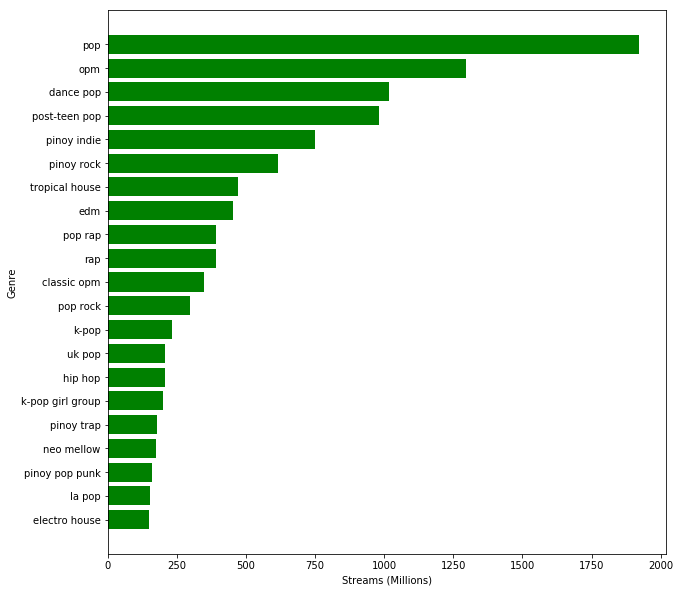

**(10 points)**

In [50]:
import matplotlib.pyplot as plt

top20_genre = genre_df.sort_values(by="count",ascending=False).head(20)

fig, ax = plt.subplots(1)

plt.title("TOP 20 MOST POPULAR GENRES IN THE PHILIPPINES")
ax.set_ylabel("Genres")
ax.set_xlabel("Streams(Millions)")
ax.invert_yaxis()

ax.barh(width=(genre_df.sort_values(by="count",ascending=False).head(20).loc[:,"count"]),y=(genre_df.sort_values(by="count",ascending=False).head(20).loc[:,"genre"]), color ="#5DCEC5",)

fig.set_figheight(10)
fig.set_figwidth(10)

plt.show()

<Figure size 1000x1000 with 1 Axes>

#### 4b) Who are the most popular Artists in the Philippines (as measured by stream count) in June 2018?

Plot a **horizontal bar**.

The resulting plot should look something like this:

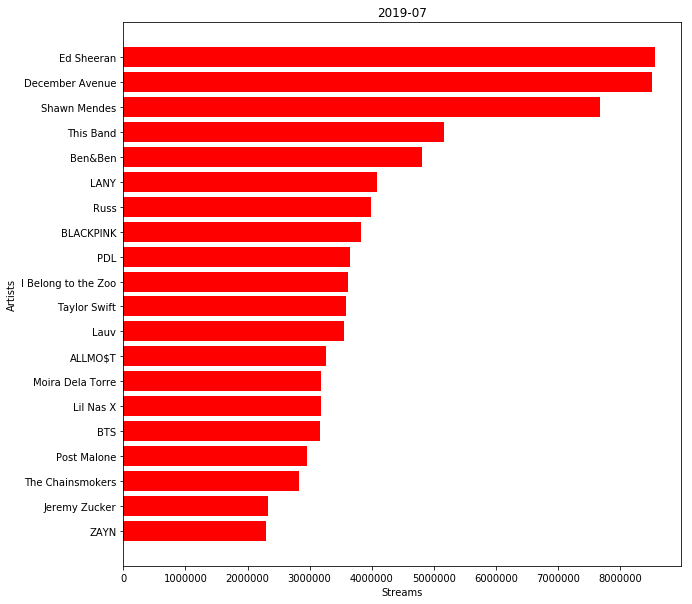

**(10 points)**

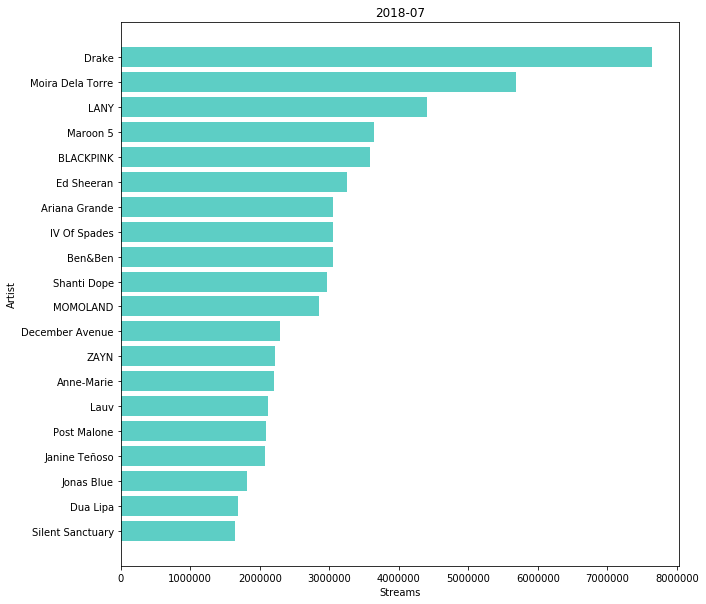

In [51]:
import matplotlib.pyplot as plt

chart_month = "2018-07"

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

## write code below
## ------------------------

june_2018_df = artist_streams_df.query("chart_month=='2018-07'")
june_2018_df = (june_2018_df.sort_values(by=["Streams"], ascending=False)).head(20)

artist = list(june_2018_df.loc[:,"Artist"])
streams = list(june_2018_df.loc[:,"Streams"])

ax.barh(width=streams,y=artist,color="#5DCEC5")
ax.invert_yaxis()
ax.set_title(chart_month)
ax.set_ylabel("Artist")
ax.set_xlabel("Streams")

plt.show()

#### 4c) What are the average features of the top 10 artists by total stream count?

There are no plots nor graphs in this number. Only display the contents of the resulting dataframe.

Revisit the `mean_audio_features_df` dataframe.  

Only include the top 10 artists by total stream count.  

Hint: Use the `total_streams_per_artist_df` dataframe as basis for your filtering.

Hint: Consider using the `DataFrame.isin(...)` method. 
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html



**(10 points)**

In [52]:
top_10 = total_streams_per_artist_df.head(10)
top_10_list = list(top_10.loc[:,"Artist"])
top_10_list

['December Avenue',
 'LANY',
 'Ben&Ben',
 'Ariana Grande',
 'This Band',
 'Moira Dela Torre',
 'I Belong to the Zoo',
 'BLACKPINK',
 'Ed Sheeran',
 'Post Malone']

In [53]:
top_10_filter = mean_audio_features_df["Artist"].isin([i for i in top_10_list])
mean_audio_features_df[top_10_filter]

,Artist,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
228,Post Malone,0.721909,0.539523,-6.567761,0.772727,0.084250,0.414093,6.471591e-07,0.114934,0.503568,125.521517
32,BLACKPINK,0.688838,0.841600,-3.301558,0.476923,0.088276,0.072153,1.094808e-04,0.180181,0.459912,124.220035
25,Ariana Grande,0.685175,0.586601,-6.263399,0.585551,0.100912,0.192346,6.365656e-04,0.177576,0.373224,121.955624
164,LANY,0.664252,0.520946,-7.953280,0.761388,0.081782,0.332822,1.171483e-03,0.142292,0.373729,104.191332
88,Ed Sheeran,0.638448,0.458016,-7.071730,0.850806,0.044580,0.443941,1.919782e-04,0.115834,0.374960,98.888218
110,I Belong to the Zoo,0.602156,0.380600,-8.468911,1.000000,0.029338,0.571800,0.000000e+00,0.190533,0.350533,132.383489
40,Ben&Ben,0.516291,0.364029,-9.314495,1.000000,0.035579,0.548160,3.741917e-05,0.134859,0.328333,110.039529
80,December Avenue,0.502028,0.617960,-5.040302,0.836923,0.030816,0.163655,3.861692e-06,0.141317,0.241929,139.310637
278,This Band,0.500404,0.467101,-9.326040,1.000000,0.034455,0.177492,3.066717e-04,0.113273,0.249172,119.414768
208,Moira Dela Torre,0.462023,0.229502,-10.057548,0.950192,0.035486,0.765996,2.048261e-04,0.178408,0.239077,129.792437


#### 4d) Which are the 10 most danceable artists who have made it in the Top 200 charts?

Plot a horizontal bar graph of these top 10 Danceable Artists.

Your resulting plot should look something like this.

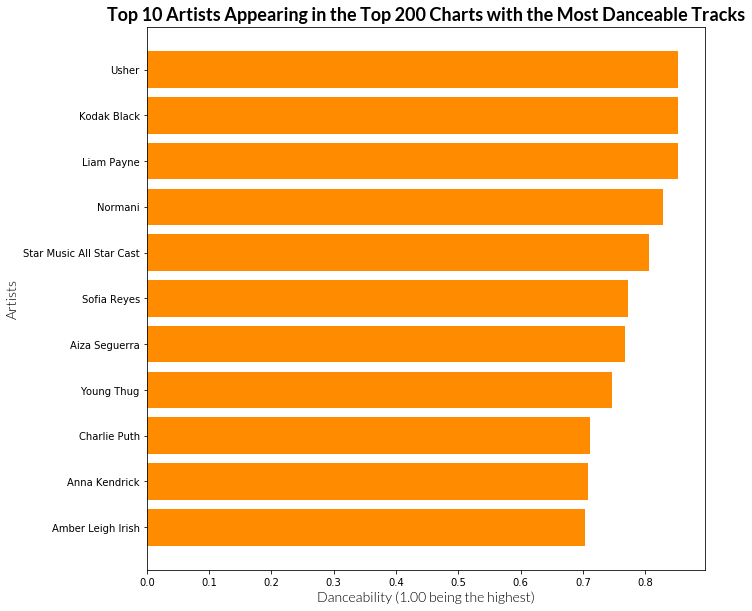

**(10 points)**

Text(0.5, 0, 'Danceability (1.00 being the highest)')

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


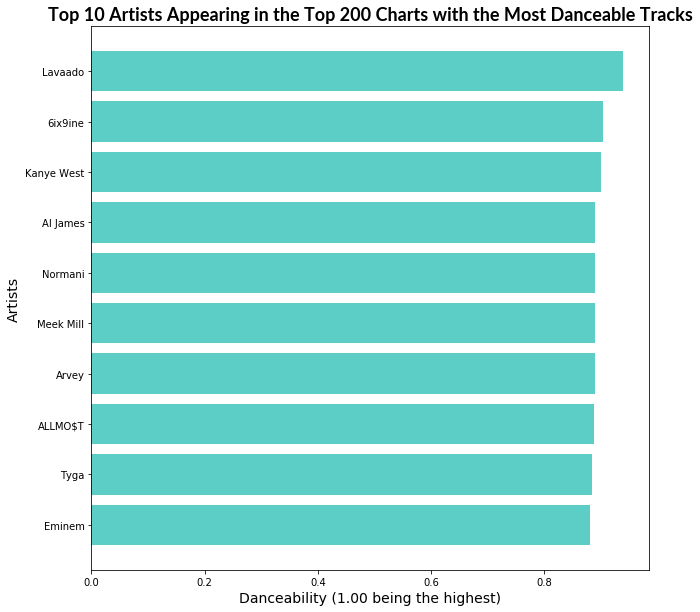

In [54]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(10)

title_font = {"fontweight":"bold", "fontfamily":"Lato", "fontsize":18}
label_font = {"fontfamily":"bold", "fontsize":14}

## write code below
## -----------------


top_10_danceability = mean_audio_features_df.head(10)
d_artist = top_10_danceability.loc[:,"Artist"]
d_danceability = top_10_danceability.loc[:,"danceability"]

ax.barh(width=d_danceability, y=d_artist, color="#5DCEC5")
ax.invert_yaxis()
ax.set_title("Top 10 Artists Appearing in the Top 200 Charts with the Most Danceable Tracks",**title_font)
ax.set_ylabel("Artists",**label_font)
ax.set_xlabel("Danceability (1.00 being the highest)",**label_font)

#### 4e) Staying power

No plots/graphs for this question. Simply dump the output below the cell containing your code.

Which artists stayed for 52 weeks in the charts? 

Prepare a new dataframe `artist_stay_df` that shows the number of periods (weeks) each Artist was included in the Top 200 Charts.

**Hint:** It's possible that one artist can have several tracks in the Top 200 all at at the same time, but we need to count this stay only once. Use `DataFrame.drop_duplicates()` to get unique rows.

Also try to sort by "weeks" in descending order.

**(10 points)**

In [55]:
df.drop_duplicates(subset = ['Artist','begin_date'],inplace=True)

In [56]:
df = df.dropna()

In [57]:
len(df)

6347

In [58]:
df.query('Artist=="Avril Lavigne"')

,Position,Track Name,Artist,Streams,URL,file_name,begin_date,end_date,Track ID,genres,...,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,chart_month
144,145,Head Above Water,Avril Lavigne,181566,https://open.spotify.com/track/1N7YeVU0ZwAFbOh...,./spotify_data/regional-ph-weekly-2018-09-21--...,2018-09-21,2018-09-28,1N7YeVU0ZwAFbOhwM61ef6,"[canadian pop, candy pop, dance pop, pop, post...",...,0.694,-5.351,1,0.0706,0.0112,0.0,0.102,0.268,129.921,2018-09
78,79,Head Above Water,Avril Lavigne,278480,https://open.spotify.com/track/1N7YeVU0ZwAFbOh...,./spotify_data/regional-ph-weekly-2018-10-05--...,2018-10-05,2018-10-12,1N7YeVU0ZwAFbOhwM61ef6,"[canadian pop, candy pop, dance pop, pop, post...",...,0.694,-5.351,1,0.0706,0.0112,0.0,0.102,0.268,129.921,2018-10
72,73,Head Above Water,Avril Lavigne,300999,https://open.spotify.com/track/1N7YeVU0ZwAFbOh...,./spotify_data/regional-ph-weekly-2018-10-19--...,2018-10-19,2018-10-26,1N7YeVU0ZwAFbOhwM61ef6,"[canadian pop, candy pop, dance pop, pop, post...",...,0.694,-5.351,1,0.0706,0.0112,0.0,0.102,0.268,129.921,2018-10
182,183,Head Above Water,Avril Lavigne,160445,https://open.spotify.com/track/1N7YeVU0ZwAFbOh...,./spotify_data/regional-ph-weekly-2018-11-09--...,2018-11-09,2018-11-16,1N7YeVU0ZwAFbOhwM61ef6,"[canadian pop, candy pop, dance pop, pop, post...",...,0.694,-5.351,1,0.0706,0.0112,0.0,0.102,0.268,129.921,2018-11
88,89,Head Above Water,Avril Lavigne,252026,https://open.spotify.com/track/1N7YeVU0ZwAFbOh...,./spotify_data/regional-ph-weekly-2018-09-28--...,2018-09-28,2018-10-05,1N7YeVU0ZwAFbOhwM61ef6,"[canadian pop, candy pop, dance pop, pop, post...",...,0.694,-5.351,1,0.0706,0.0112,0.0,0.102,0.268,129.921,2018-10
93,94,Head Above Water,Avril Lavigne,239769,https://open.spotify.com/track/1N7YeVU0ZwAFbOh...,./spotify_data/regional-ph-weekly-2018-10-26--...,2018-10-26,2018-11-02,1N7YeVU0ZwAFbOhwM61ef6,"[canadian pop, candy pop, dance pop, pop, post...",...,0.694,-5.351,1,0.0706,0.0112,0.0,0.102,0.268,129.921,2018-11
81,82,Head Above Water,Avril Lavigne,279693,https://open.spotify.com/track/1N7YeVU0ZwAFbOh...,./spotify_data/regional-ph-weekly-2018-10-12--...,2018-10-12,2018-10-19,1N7YeVU0ZwAFbOhwM61ef6,"[canadian pop, candy pop, dance pop, pop, post...",...,0.694,-5.351,1,0.0706,0.0112,0.0,0.102,0.268,129.921,2018-10
122,123,Head Above Water,Avril Lavigne,193185,https://open.spotify.com/track/1N7YeVU0ZwAFbOh...,./spotify_data/regional-ph-weekly-2018-11-02--...,2018-11-02,2018-11-09,1N7YeVU0ZwAFbOhwM61ef6,"[canadian pop, candy pop, dance pop, pop, post...",...,0.694,-5.351,1,0.0706,0.0112,0.0,0.102,0.268,129.921,2018-11


In [59]:
begindateset = [i for i in df.loc[:,"begin_date"]]
begindateset = list(set(begindateset))

In [60]:
begindateset = begindateset[1:]

In [61]:
artistset = [i for i in df.loc[:,"Artist"]]
artistset = list(set(artistset))

In [62]:
stayingpower = dict()
begindates = [i for i in df.loc[:,"begin_date"]]
artists = [i for i in df.loc[:,"Artist"]]

In [63]:
week_tally = {}

for artist in artistset:
    week_tally[artist]=0
    
for artist in artists:
    week_tally[artist]+=1

week_tally

{'Zac Efron': 52,
 'Rihanna': 52,
 'Stephen Speaks': 31,
 'Maren Morris': 3,
 'Khalid': 52,
 'The 1975': 6,
 'Imago': 22,
 'Lady Gaga': 39,
 'Gryffin': 6,
 'Rex Orange County': 16,
 'Young Thug': 3,
 'John Mayer': 2,
 'The Pussycat Dolls': 52,
 'Armi Millare': 19,
 'Luh Kel': 7,
 'Avicii': 13,
 'Rita Ora': 12,
 'SHAED': 4,
 '21 Savage': 3,
 'Nicki Minaj': 7,
 'Callalily': 52,
 'Moira Dela Torre': 52,
 'Morissette': 36,
 'Lil Eddie': 9,
 'Billie Eilish': 40,
 'Lukas Graham': 44,
 'LEE HI': 1,
 'Arvey': 1,
 'KZ Tandingan': 23,
 'Steve Aoki': 12,
 'Vanessa Carlton': 28,
 'FLETCHER': 2,
 'Logic': 4,
 'Mark Carpio': 52,
 'Chlara': 2,
 'Niall Horan': 2,
 'Billy Crawford': 19,
 'Lil Nas X': 15,
 'Post Malone': 52,
 'Kanye West': 6,
 'I Belong to the Zoo': 51,
 'Zara Larsson': 22,
 'Miley Cyrus': 2,
 'Gesaffelstein': 3,
 'Alec Benjamin': 19,
 'Snow Patrol': 16,
 'Ellie Goulding': 37,
 'Reneé Dominique': 1,
 'Agsunta': 5,
 'Machine Gun Kelly': 1,
 'James Blunt': 4,
 'SOMI': 4,
 'Frank Sinatra':

In [64]:
artist_stay_df = pd.DataFrame()
artist_stay_df["Artist"] = [i for i in week_tally]
week_totals = []

for i in week_tally:
    week_totals.append(week_tally[i])
    
artist_stay_df["weeks"] = [i for i in week_totals]

In [65]:
artist_stay_df = artist_stay_df.sort_values(by="weeks",ascending=False)
artist_stay_df

,Artist,weeks
0,Zac Efron,52
186,John Roa,52
178,Parokya Ni Edgar,52
177,SUD,52
173,Silent Sanctuary,52
153,benny blanco,52
1,Rihanna,52
149,Lauv,52
148,Anne-Marie,52
140,Ben&Ben,52
